# Regresión Logística - Clasificación

Como vimos previamente en clase, podemos enfrentarnos a problemas donde tengamos que relacionar variables numéricas contra algún valor categórico que puede tomar dos o más valores.

A este tipo de problemas los llamamos de clasificación y podemos atacarlos usando muchas herramientas de ML. No obstante, acá sólo veremos una, simple, pero ampliamente utilizada (incluso como pieza fundamental de algoritmos más complejos): **regresión logística**




In [1]:
import pandas as pd # Para manejo de base de datos
import numpy as np # Para manejo de arrays, operaciones matemáticas, etc.
import matplotlib.pylab as plt # Para gráficos
from sklearn.linear_model import LogisticRegression # El método de regresión logística que vamos a usar
# Módulos utiles para evaluar el modelo 
from sklearn.model_selection import train_test_split # Para separar en train y test
from sklearn.metrics import plot_confusion_matrix
from sklearn.datasets import load_breast_cancer

Ahora, traigamos el data set. 

In [7]:
cancer = load_breast_cancer()
df = pd.DataFrame(np.c_[cancer['data'], cancer['target']],
                  columns= np.append(cancer['feature_names'], ['target']))

In [8]:
print('Dimensión del dataset: {}'.format(df.shape))
# Inspección de los primeros datos
df.head(3)

Dimensión del dataset: (569, 31)


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0


In [9]:
labels, counts = np.unique(df['target'], return_counts=True) # Función que devuelve las etiquetas y las frecuencias

print('Etiquetas {}'.format(labels))
print('Frecuencias {}'.format(counts))

Etiquetas [0. 1.]
Frecuencias [212 357]


# El Modelo

Ya estamos listos para poder jugar con sklearn y la clasificación.

### Antes, recordatorio

$$P(y |x, \beta) = \frac{1}{1 + e^{-(\beta_0 + \beta_1 \cdot x)}}$$

es lo que llamamos función sigmoidea para el caso de tener un único feature

In [24]:
random_seed = 7
# Lista de features que vamos a considerar 
features = ['mean radius']

# Variable a predecir
target = 'target'

# Construcción de la matriz de features
X = df[features].to_numpy()

# Construcción del vector a predecir
y = df[target].to_numpy()
# Creacion de las matrices de entrenamiento y testeo. 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=random_seed)
print('Dimensión de la matriz de features para entrenamiento: {}'.format(X_train.shape))
print('Dimensión de la matriz de features para testeo: {}'.format(X_test.shape))

regLog = LogisticRegression(penalty = 'none')   

regLog.fit(X_train,  y_train)

score_in_train = regLog.score(X_train, y_train) # Es el score del ajuste 

# coeficientes estimados en regresion logistica
beta_0 = regLog.intercept_ # Es el método para obtener el beta 0
beta_1 = regLog.coef_ # Es el método para obtener el beta 1

# Score del modelo en el conjunto de testeo
score_in_test = regLog.score(X_test, y_test)

print('Score en el set de entrenamiento: {}'.format(score_in_train))
print('Score en el set de testeo: {}'.format(score_in_test))


Dimensión de la matriz de features para entrenamiento: (455, 1)
Dimensión de la matriz de features para testeo: (114, 1)
Score en el set de entrenamiento: 0.8725274725274725
Score en el set de testeo: 0.9122807017543859


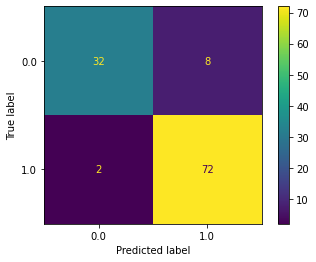

In [25]:
# score de entrenamiento < score testeo, no suele ser asi
# por que?
# se prueba cambiar de semilla
# 
plot_confusion_matrix(regLog, X_test, y_test)  
plt.show()

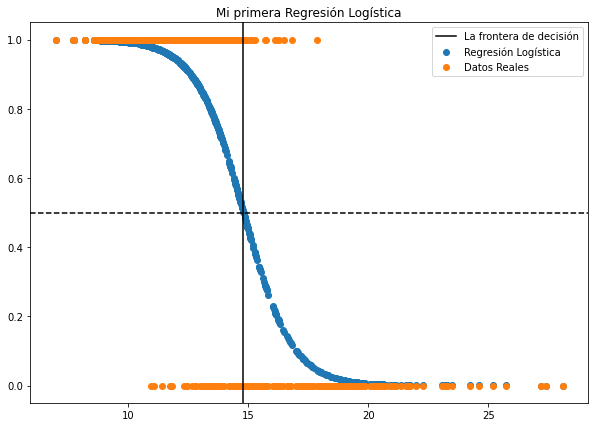

In [26]:
fig, ax = plt.subplots(figsize = (10,7)) # Generamos la figura
ax.set_title('Mi primera Regresión Logística')

ax.scatter(X, # Los valores X
          1 / (1 + np.e ** -(beta_1 * X + beta_0)), # Las predicciones sobre los valores X
          label = 'Regresión Logística', 
          )

ax.scatter(X, # Los valores X
           y, # Los valores reales de Y
           label = 'Datos Reales'
           )
ax.axvline(- beta_0 / beta_1, # La frontera de decisión. 
           color = 'k',
           label = 'La frontera de decisión')
ax.axhline(0.5,
           linestyle = 'dashed',
           color = 'k')
ax.legend()
plt.show()



# Y si usamos más campos para el entrenamiento?

In [36]:
# Definamos la matriz X
features = ['mean radius','worst texture','worst area'] # Lista que contiene las features de interés
# Variable a predecir
target = 'target'

# Construcción de la matriz de features
X = df[features].to_numpy()

# Construcción del vector a predecir
y = df[target].to_numpy()
# Creacion de las matrices de entrenamiento y testeo. 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=random_seed)
print('Dimensión de la matriz de features para entrenamiento: {}'.format(X_train.shape))
print('Dimensión de la matriz de features para testeo: {}'.format(X_test.shape))

regLog = LogisticRegression(penalty = 'none') # Inicializamos nuevamente el modelo
regLog.fit(X_train,  y_train)

score_in_train = regLog.score(X_train, y_train) # Es el score del ajuste 
beta_0 = regLog.intercept_ # El beta 0
beta_1 = regLog.coef_[0][0] # El coeficiente beta_1
beta_2 = regLog.coef_[0][1] # El coeficiente beta_2

# Score del modelo en el conjunto de testeo
score_in_test = regLog.score(X_test, y_test)

print('Score en el set de entrenamiento: {}'.format(score_in_train))
print('Score en el set de testeo: {}'.format(score_in_test))


Dimensión de la matriz de features para entrenamiento: (455, 3)
Dimensión de la matriz de features para testeo: (114, 3)
Score en el set de entrenamiento: 0.9384615384615385
Score en el set de testeo: 0.9385964912280702


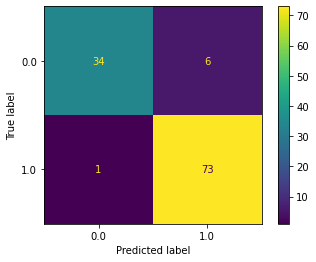

In [37]:
# no estoy en un caso de sobre ajuste
# un tip para saber si estoy en sobreajuste es que el score de train es mucho mayor al de testeo

plot_confusion_matrix(regLog, X_test, y_test)  
plt.show()

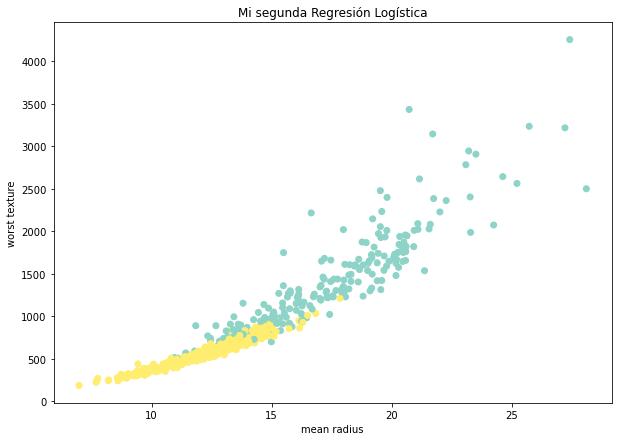

In [35]:
# Miremos esto en un gráfico

fig, ax = plt.subplots(figsize = (10,7))

ax.set_title('Mi segunda Regresión Logística')
ax.scatter(X[:,0], # Ploteamos la primera columna de nuestra matriz X. Osea, mean radius
           X[:,1], # Ploteamos la segunda columna de nuestra matriz X. Osea, worst texture
           c = y, # Les damos color a los puntos según la etiqueta real
           cmap = 'Set3', # El mapa de color
           )
ax.set_xlabel('mean radius') # Etiqueta del eje x
ax.set_ylabel('worst texture') # Etiqueta del eje y

# Plotear la curva acá, no sería de mucho interés. Sí podríamos colorear un área como representación de la función P: R² ---> R
# Plotiemos la frontera de decisión


plt.show()

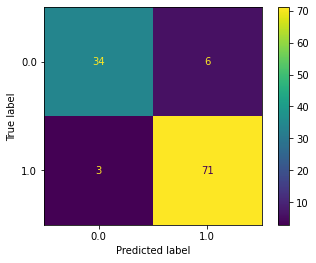

In [119]:
plot_confusion_matrix(regLog, X_test, y_test)  
plt.show()

# Para llevarse de este Notebook


*   Existe un objeto llamado LogisticRegression en scikit-learn que crea una instancia de regresión logística haciendo:

```
regLog = LogisticRegression(penalty = 'none') 
```

*   Podemos entrenar a este objeto para un problema de **clasificación** haciendo:


```
regLog.fit(X,  y)
```

... donde X es la matriz de muestas (filas) por variables independientes (columnas), e y es un vector binario con las etiquetas de cada clase.



*   Podemos obtener el score de la regresión logística haciendo:

```
score = regLog.score(X,y)
```

*   Y obtener los parámetros del modelo:


```
beta_0 = regLog.intercept_ # Es el método para obtener el beta 0
beta_1 = regLog.coef_ # 
a```